In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

/opt/homebrew/anaconda3/envs/fire_base/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88, got 80
  return f(*args, **kwds)


In [28]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

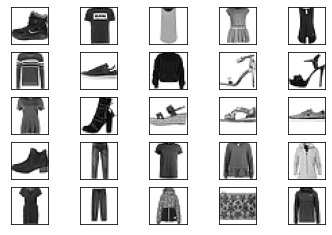

In [29]:
class_name = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()    

In [30]:
x_train, x_test = x_train / 255.0, x_test / 255.0


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')])


model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2) #test_data로 모델 평가

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.5278 - accuracy: 0.8142s - los
Epoch 2/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3983 - accuracy: 0.8565
Epoch 3/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3666 - accuracy: 0.8669
Epoch 4/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3459 - accuracy: 0.8743
Epoch 5/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3295 - accuracy: 0.8801
10000/1 - 1s - loss: 0.2767 - accuracy: 0.8739


[0.356149867272377, 0.8739]

In [31]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [32]:
x_train_final = x_train.reshape((-1, 28, 28, 1)) / 255.
x_test_final = x_test.reshape((-1, 28, 28, 1)) / 255.

In [34]:
model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',
                          input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_with_conv.compile(optimizer='adam',
                       loss = 'sparse_categorical_crossentropy',
                       metrics=['accuracy'])

model_with_conv.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               401536    
_________________________________________________________________
dense_36 (Dense)             (None, 10)              

In [35]:
model_with_conv.fit(x_train_final, y_train, epochs=5)
model_with_conv.evaluate(x_test_final, y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 140s 2ms/sample - loss: 0.8264 - accuracy: 0.6946
Epoch 2/5
60000/60000 [==============================] - 139s 2ms/sample - loss: 0.5436 - accuracy: 0.7989
Epoch 3/5
60000/60000 [==============================] - 137s 2ms/sample - loss: 0.4718 - accuracy: 0.8267
Epoch 4/5
60000/60000 [==============================] - 135s 2ms/sample - loss: 0.4273 - accuracy: 0.8450
Epoch 5/5
60000/60000 [==============================] - 135s 2ms/sample - loss: 0.3993 - accuracy: 0.8561
10000/1 - 11s - loss: 0.3267 - accuracy: 0.8503


[0.41686149480342866, 0.8503]